# 120 Years of Olympic History
## by Nikhil Kumar

## Investigation Overview

> This data could provide intriguing insights of women in the Olympics. It had taken a long time for women to have the opportunity to participate in the Olympic Games and women's participation has increased over the years. It will also be interesting to see which countries tend to win the most medals and in what years they have appeared to be dominant in. Features in the data such as the age, height, and weight of each athlete and specific medals won will be very interesting to examine as well.

## Dataset Overview

> This dataset contains data for all Olympic Games from Athens 1896 to Rio 2016 and was retrieved from [here](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). There are over 200,000 rows that contains information on each individual athlete including their gender, medal, country, sport, and more. The data encompasses both the summer and winter games. There is a plethora of valuable data in this dataset that can pave the way to discovering insights of how the Olympics have changed over the years.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_new = pd.read_csv('clean-data.csv')
df_new.head()

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170,60,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,176,73,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,177,75,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Male and Female Participation

> As expected, there are far more males in this dataset than females especially since females did not have the same opportunities to participate in the Olympic Games for many years. Males make up 71.6% of the data while females only make up 28.4% of the dataset.

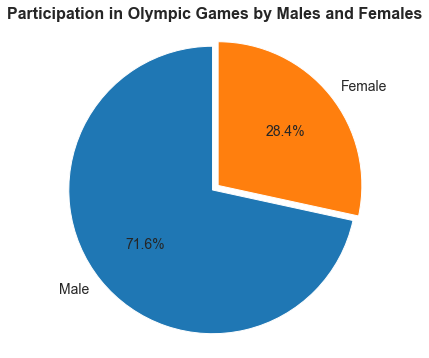

In [3]:
sb.set_style('darkgrid')
base_color = sb.color_palette('colorblind')[0]
plt.figure(figsize=[6,6])

gender_props = df_new.Sex.value_counts()/df_new.shape[0]
plt.pie(gender_props, labels = ['Male', 'Female'], startangle = 90, 
       counterclock = True, explode = [0,0.05], autopct = '%1.1f%%', textprops = {'fontsize': 14})
plt.axis('square')
plt.title('Participation in Olympic Games by Males and Females', fontweight = 'bold', fontsize = 16);

## Gender Participation Over Time

> From 1896 to 1952, there were little to no female Olympians. However, as time went on, more and more female athletes started to compete. In 2016, The number of male and female athletes were almost even and both genders had over 6,000 athletes competing. Notice that after 1992, the total numbers of athletes start to alternate between high and low, while the highs are not as high as in the past. This is because the Summer and Winter Olympic Games began to stagger in when they took place.

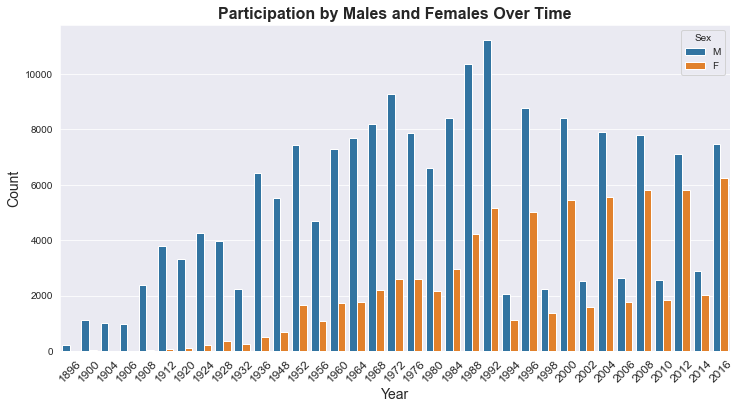

In [4]:
plt.figure(figsize = [12,6])
sb.countplot(data = df_new, x = 'Year', hue = 'Sex')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Participation by Males and Females Over Time',fontweight = 'bold', fontsize = 16);

## Average Age of Male and Female Athletes Over Time

> The first female Olympian competed in 1900 and the average ages for these female athletes were rather high in the first few Omympic games. This is primarily due to the fact that there considerably less female athletes competing in these early years.  The average age for males, however, has been rather stagnant between 25 and 30 years old. As time went by, the average ages for both males and females became relatively close with the average female athlete slightly younger than males at around 25 years old. 

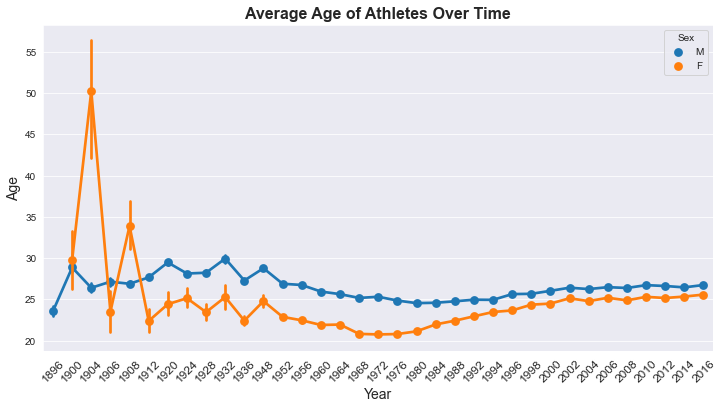

In [5]:
plt.figure(figsize = [12,6])
sb.pointplot(data = df_new, x = 'Year', y = 'Age', hue = 'Sex')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Age', fontsize = 14)
plt.title('Average Age of Athletes Over Time', fontweight = 'bold', fontsize = 16);

## Top 10 Winning Teams of All Time

> The graph below displays the top 10 teams that have won the most medals of all time. It is clear that the United States has by far the most Olympic medals with the Soviet Union being seconds and Germany at third.

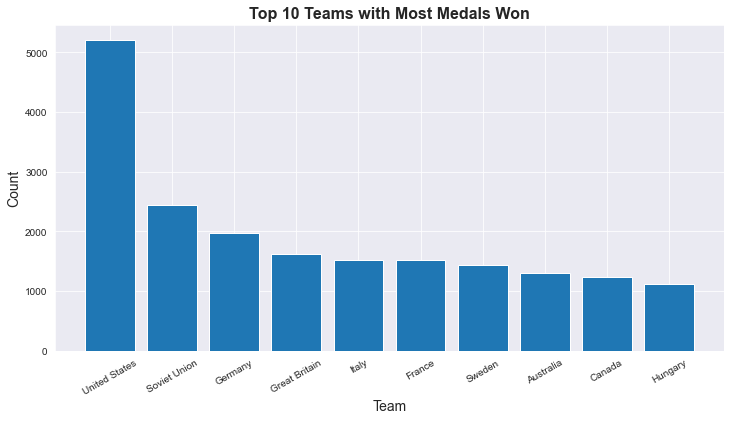

In [6]:
awarded = df_new[df_new['Medal'].notnull()]
top_teams = awarded.Team.value_counts()[:10]
plt.figure(figsize = [12,6])
plt.bar(top_teams.index, top_teams.values)
plt.xticks(rotation = 30)
plt.xlabel('Team', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title("Top 10 Teams with Most Medals Won", fontweight = 'bold', fontsize = 16);

## Number of Medals Won by Top 10 Teams Each Year

> It is evident that the United States has been the most consistent team over the years by winning many medals at each Olympic Games. Conversely, the Soviet Union has not been consistent over time. They did not win as many medals relatively other than an extremely powerful stretch from 1952 to 1988. They had by far the most dominant year than any other team has ever had when they won the most medals in 1990.

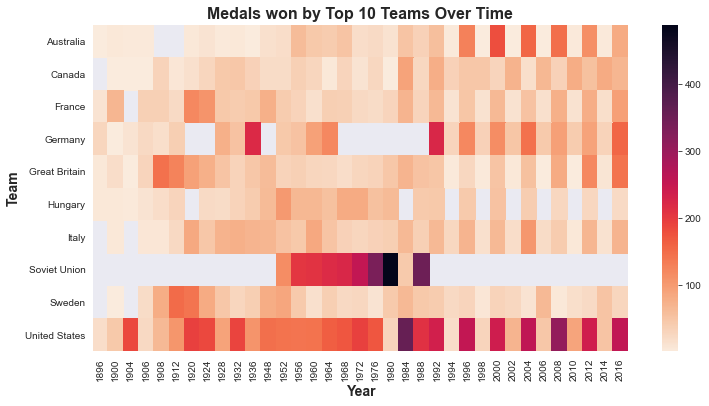

In [7]:
awarded = df_new[df_new['Medal'].notnull()]
top_teams = awarded.Team.value_counts()[:10]
top_10 = awarded[awarded['Team'].isin(top_teams.index)]
top_counts = top_10.groupby(['Team', 'Year']).size()
top_counts = top_counts.reset_index(name = 'count')
top_counts = top_counts.pivot(index = 'Team', columns = 'Year', values = 'count')

plt.figure(figsize = [12,6])
sb.heatmap(top_counts, cmap = 'rocket_r')
plt.title("Medals won by Top 10 Teams Over Time", fontsize = 16, fontweight = 'bold')
plt.xlabel('Year', fontsize = 14, fontweight = 'semibold')
plt.ylabel('Team', fontsize = 14, fontweight = 'semibold');

In [1]:
!jupyter nbconvert final_slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook final_slide_deck.ipynb to slides
[NbConvertApp] Writing 480915 bytes to final_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Nikhil\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Nikhil\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Nikhil\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Nikhil\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Nikhil\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File 